# Recommender System with Python

## Overview

we will be working with movielens dataset. The dataset consist of two .csv files, movies.csv and ratings.csv. If you want, you can directly downloaded these files from the provided link.

##### Let's import some libraries

In [1]:
import numpy as np
import pandas as pd

##### Let's read the datafiles

In [2]:
movies = pd.read_csv('movies.csv')

In [3]:
ratings  = pd.read_csv('ratings.csv')

##### Let's check the head of movies and ratings

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In the ratings dataset, we have userId, movieId, rating that the movie got from a specific user, and the timestamp at which the movie got rating from the user. 

If we look at both ratings and movies datasets, movieId column is a common column. Let's merge the dataframes on movieId and output the head() of the merged data.

In [6]:
df = pd.merge(ratings,movies, on = 'movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


##### Let's do some pre-processing on data

The first thing we can do is to create a dataframe that tells us the average rating for the movie and number of ratings the movie we got.
To do this, we can use the groupby method.

We need to groupby the movies on title and then grab the rating column to get its mean, so that we have the mean rating of each movie. We can also use sort_values(ascending = False) to re-arrange the entries from higher to lower mean rating and then check the head of dataframe, all in a single line code.

In [7]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Burn Up! (1991)                                     5.0
Absolute Giganten (1999)                            5.0
Gentlemen of Fortune (Dzhentlmeny udachi) (1972)    5.0
Erik the Viking (1989)                              5.0
Reality (2014)                                      5.0
Name: rating, dtype: float64

There is an important situation to consider in the above groupby operation, while getting the mean rating.

What if only 1 or 2 persons have watched a movie and gave a 5 stars rating to it.
On the other hand, there could be a movie that got a good number of ratings between 1 and 5 stars. The average in such situation will be less then 5 but the number of watcher are higher.

Once again, groupby on title and grab the ratings column. Instead of mean, we want count for this task. We can again use sort_values(ascending =False) 
to order the entries and check the head of our dataset.

In [8]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                          341
Pulp Fiction (1994)                          324
Shawshank Redemption, The (1994)             311
Silence of the Lambs, The (1991)             304
Star Wars: Episode IV - A New Hope (1977)    291
Name: rating, dtype: int64

It looks like the top 5 famous movies don't have the 5 star average rating. 
This is fine, you can imagine, if the movie, e.g. Forrest Gump got 341 ratings, all ratings must be 5 star to get average value of 5. 

Many of us may not know even the name of the movie with average 5 star rating, but, most of us might be familiar with the movies with most number of ratings, such as Start Wars in the list on number 5.

##### Let's create a new dataframe rating, in which we group the movies with their mean or average rating. 

we are going to use groupby on title and grab the rating columns to get its mean.

In [9]:
rating = pd.DataFrame(df.groupby('title')['rating'].mean())

In [10]:
rating.head()

,rating
title,
"""Great Performances"" Cats (1998)",1.750000
$9.99 (2008),3.833333
'Hellboy': The Seeds of Creation (2004),2.000000
'Neath the Arizona Skies (1934),0.500000
'Round Midnight (1986),2.250000


In the above dataframe, we got the average rating for each movie in rating column and name of the movie in title column. This does not make much sense for the movies who got several number of rating as compare to those who got very few.

We need to look at the number of ratings as well. 

##### Let's create another column n_ratings that tell us the number of ratings for each movie.

In [11]:
rating['n_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
rating.head()

,rating,n_ratings
title,,
"""Great Performances"" Cats (1998)",1.750000,2
$9.99 (2008),3.833333,3
'Hellboy': The Seeds of Creation (2004),2.000000,1
'Neath the Arizona Skies (1934),0.500000,1
'Round Midnight (1986),2.250000,2


We have a dataframe rating with three columns title, rating which is actually average of mean rating, and n_rating.

## Exploratory Data Analysis

##### Let's import some librairies again

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

To learn from our dataset, let's plot two histograms side-by-side, one for No. of ratings for movies, n_ratings column, and the other for average rating which is rating column in the dataframe.

We can creates two subplots and unpacks the output array immediately.

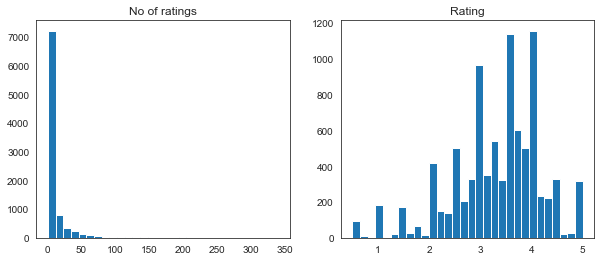

In [13]:
f , (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
ax1.set_title('No of ratings')
ax1.hist(rating['n_ratings'], bins = 30)

ax2.set_title('Rating')
ax2.hist(rating['rating'], bins = 30)

plt.show()

If we look at the "No. of Ratings" on the left, we learn that most of the movies have 0 or 1 number of ratings! So, either, people have not watched those movies and if they have watched, they did not rate them. The first argument somehow make sense, because, most of the time we prefer to watch only the famous movies.

If we look at the "Rating, which is actually the mean rating" on the right, we may find that there are peaks at the whole numbers {1,2,3,4,5}. This is again a usual act, most of the time people rate the things with the whole numbers. 

Notice, there are some movies with average 5 star rating, they might be the outstanding movies or may got only few ratings. You can also point out some movies with really bad rating. However, most of the movies got average rating between 3 and 4. 

##### Let's check the relationship between rating and no. of rating with a seaborn jointplot()

C:\Users\Stevy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


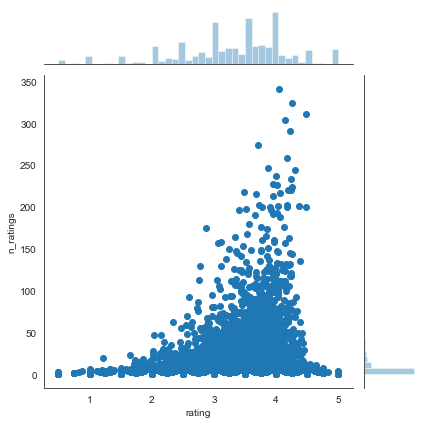

In [14]:
sns.jointplot(x='rating', y = 'n_ratings', data=rating)
plt.show()

The joint plot is is making sense, more the number of rating a movie have, more average rating it gets.

Good the movie is, more people will watch it and the movie will get more number of ratings or reviews. This is a normal act.
We also see from the plot that the 1 or 2 stars movie have very few number of ratings.

## Recommender System for similar movie

##### Let's develop a simple recommender system that can recommend similar movies to the user.

In [15]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


Let's create a matrix that will have the userId on one axis (index) and the title on another axis (columns) whereas, rating as its value. In the way, each cell will consist of the rating that the user gave to a certain movie.

We need userId, title and rating columns for such matrix. We are going to use pivot_table() method to get our required matrix.

Our parameter for the pivot_table() will be: 

In [16]:
rating_mat = df.pivot_table(values='rating', index='userId', columns='title')

In [17]:
rating_mat.head()

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Let's check the most rated movies once again from our rating dataframne.

In [18]:
rating.sort_values('n_ratings', ascending=False).head(10)

,rating,n_ratings
title,,
Forrest Gump (1994),4.054252,341
Pulp Fiction (1994),4.256173,324
"Shawshank Redemption, The (1994)",4.487138,311
"Silence of the Lambs, The (1991)",4.138158,304
Star Wars: Episode IV - A New Hope (1977),4.221649,291
Jurassic Park (1993),3.706204,274
"Matrix, The (1999)",4.183398,259
Toy Story (1995),3.872470,247
Schindler's List (1993),4.303279,244


In [21]:
movies[movies['title']=='Forrest Gump (1994)']

,movieId,title,genres
321,356,Forrest Gump (1994),Comedy|Drama|Romance|War


In [22]:
movies[movies['title']=='Matrix, The (1999)']

,movieId,title,genres
2062,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [25]:
FG_user_ratings = rating_mat['Forrest Gump (1994)']
Matrix_user_ratings = rating_mat['Matrix, The (1999)']

In [26]:
FG_user_ratings.head(), Matrix_user_ratings.head()

(userId
 1    NaN
 2    3.0
 3    5.0
 4    5.0
 5    4.0
 Name: Forrest Gump (1994), dtype: float64, userId
 1   NaN
 2   NaN
 3   NaN
 4   NaN
 5   NaN
 Name: Matrix, The (1999), dtype: float64)

we got the user ratings for the selected movies. 
Now, we want to know how these movies are correlated to the other movies in the dataframe. 

Let's see how the user rating of Forrest Gump (FG_user_ratings) is correlated with the user rating of all other movies in the rating_mat.

We are going to compute the correlation of FG_user_ratings to the user rating or user behavior for all other movies and passing that to similar_to_FG and  similar_to_Matrix.

In [31]:
similar_to_FG = rating_mat.corrwith(FG_user_ratings)
similar_to_Matrix =rating_mat.corrwith(Matrix_user_ratings)

C:\Users\Stevy\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Stevy\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


similar_to_FG.head()

We need to clean the data for null value using dropna(). 

First, We can create a dataframe instead of series so that it look little nicer, and then we will deal with NaN.

In order to create a dataframe, we need to pass similar_to_FG and similar_to_matrix to pandas DataFrame(). We can set the column name as correlation.

In [32]:
corr_FG = pd.DataFrame(similar_to_FG, columns=['correlation'])
corr_FG.head()

,correlation
title,
"""Great Performances"" Cats (1998)",NaN
$9.99 (2008),1.0
'Hellboy': The Seeds of Creation (2004),NaN
'Neath the Arizona Skies (1934),NaN
'Round Midnight (1986),NaN


##### Let's drop NaN and check the head

corr_FG.dropna(inplace = True)
corr_FG.head()

##### Let's do the same for Matrix

corr_matrix = pd.DataFrame(similar_to_Matrix, columns=['correlation'])
corr_matrix.dropna(inplace = True)
corr_matrix.head()

##### Let's sort Matrix

In [38]:
corr_matrix.sort_values('correlation', ascending=False).head()

,correlation
title,
Project X (2012),1.0
Southland Tales (2006),1.0
Savages (2012),1.0
Escape from Alcatraz (1979),1.0
"Umbrellas of Cherbourg, The (Parapluies de Cherbourg, Les) (1964)",1.0


We may not have ever heard about most of these movies but the correlation that we got is perfect. The results does not make much sense. 

We need to fix this and we know what the reason is. Most likely, these movies are watched only once by the same users who also watched Matrix and rated both with similar stars.

To fix this, we can set a threshold value for the ratings.
Let's re-plot a histogram for n_rating to see which could be a good threshold value for no of ratings.

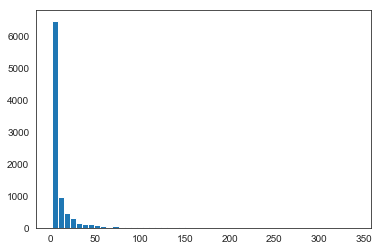

In [40]:
plt.hist(rating['n_ratings'], bins = 50)
plt.show()

We can see that the drop is significant after n_rating = 50.

We can select 50 as a minimum no. of rating in order to be considered into our recommender system.

##### Let's sort the value again with the condition (n_rating >50) and also join the n_ratings column from rating dataframe to corr_matrix dataframe and apply the condition for n_rating > 50

In [41]:
corr_matrix = corr_matrix.join(rating['n_ratings'])
corr_matrix.head()

,correlation,n_ratings
title,,
$9.99 (2008),1.000000,3
"'burbs, The (1989)",0.056624,19
(500) Days of Summer (2009),0.368837,45
*batteries not included (1987),0.743955,7
...And Justice for All (1979),-0.610170,13


##### Let's sort the values in order from high to low

In [ ]:
corr_matrix[corr_matrix['n_ratings']>50].sort_values('correlation', ascending = False).head()

The results make much more sense! Matrix has the perfect correlation to itself. The Star Trek is the closely correlated with Matrix.

##### Let's do the same for Forrest Gump

In [44]:
corr_FG = corr_FG.join(rating['n_ratings'])
corr_FG[corr_FG['n_ratings']>50].sort_values(
    'correlation', ascending = False).head()

,correlation,n_ratings
title,,
Forrest Gump (1994),1.000000,341
My Big Fat Greek Wedding (2002),0.626240,51
"Beautiful Mind, A (2001)",0.575922,114
"Few Good Men, A (1992)",0.555206,76
Million Dollar Baby (2004),0.545638,65
